In [62]:
# Essential Imports
import pandas as pd
import numpy as np

# Pipeline for Scaling, Feature selection, and Regression
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, RFE, f_regression
from sklearn.impute import SimpleImputer

# Graphing and Metrics for Model
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

In [30]:
df_train = pd.read_csv("data/train.csv")
data_dummies = pd.get_dummies(df_train.drop(["PassengerId","Name"],axis=1),dummy_na=True)
imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
imputed_data = imputer.fit_transform(data_dummies)
data_imputed = pd.DataFrame(data=imputed_data, columns=imputer.get_feature_names_out())
data_imputed.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,Cabin_T/2/S,Cabin_T/3/P,Cabin_nan,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_nan,VIP_False,VIP_True,VIP_nan
0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,16.0,303.0,70.0,151.0,565.0,2.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [38]:
data_imputed.isnull().values.any()

False

### Scale the Data

In [58]:
# Scale data
scaler_data = MinMaxScaler()
scaler_data.fit(data_dummies)
data_scaled = scaler_data.transform(data_dummies)

scaler_y = MinMaxScaler()
scaler_y.fit(data_dummies[["Transported"]])
y_scaled = scaler_y.transform(data_dummies[["Transported"]])

scaler_data.get_feature_names_out()
x_scaled = pd.DataFrame(data=data_scaled,columns=scaler_data.get_feature_names_out()).fillna(0)
x_scaled.head()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,Cabin_T/2/S,Cabin_T/3/P,Cabin_nan,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Destination_nan,VIP_False,VIP_True,VIP_nan
0,0.493671,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.303797,0.007608,0.000302,0.001064,0.024500,0.001823,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.734177,0.003001,0.119948,0.000000,0.299670,0.002030,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.417722,0.000000,0.043035,0.015793,0.148563,0.007997,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.202532,0.021149,0.002348,0.006428,0.025214,0.000083,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


### PCA Analysis to understand the features

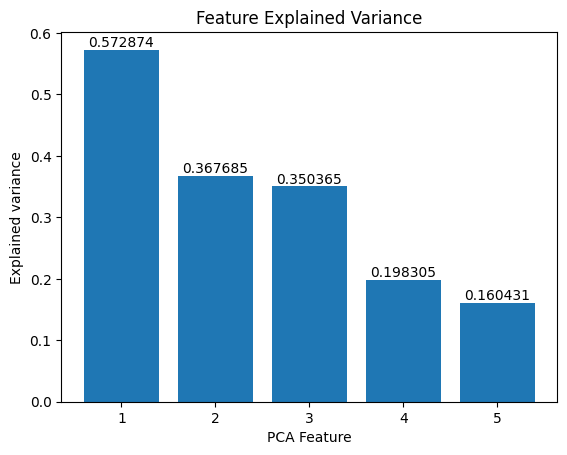

In [59]:
pca = PCA(n_components=5)
pca.fit_transform(x_scaled,y_scaled)

# Bar plot of explained_variance
fig, ax = plt.subplots()
bars = ax.bar(range(1,len(pca.explained_variance_)+1),pca.explained_variance_)
ax.bar_label(bars)
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

### Feature Selection and PLS Regression on dataset

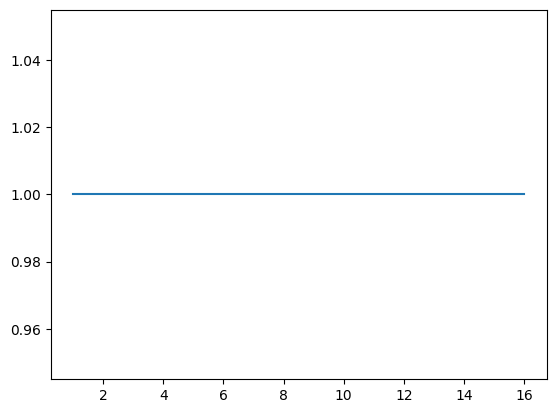

In [64]:
r2_list = []
max_features = 20
for i in range(1,max_features,5):
    feature_selector = SelectKBest(score_func=f_regression, k=i)
    x_new = feature_selector.fit_transform(x_scaled,y_scaled)
    new_data = x_scaled.filter(items=feature_selector.get_feature_names_out())
    regressor = LinearRegression()
    regressor.fit(X=new_data,y=y_scaled)
    y_pred = regressor.predict(X=new_data)
    r2_list.append(r2_score(y_scaled, y_pred))
plt.plot(range(1,max_features,5),r2_list)

In [68]:
regressor = LinearRegression()
regressor.fit(X=new_data,y=y_scaled)
preds = regressor.predict(new_data)

In [69]:
r2_score(y_scaled,preds)

1.0